<h1><center>Student Performance Predictor Project</center></h1>

<h1><span style='color:#b846a3;font-family:Comic Sans MS'>Objectives :</span></h1>

In this notebook, we will  :

- **Train a model to Predict whether or not a student will pass the final exam based on certain information given**
 
- **Find out what most affects student achievement**
 

We will be using three learning algorithms and compare them:

- **Logistic regression**
  Logistic Regression is a statistical method for modeling the probability of a binary outcome. In machine learning, it's used as a classification algorithm rather than a regression algorithm. It predicts the probability that an observation falls into one of two categories. Logistic regression is useful for binary classification tasks, such as predicting whether an email is spam or not, or if a student will pass or fail based on their study habits.

- **Decision Tree**
  A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on feature values, creating a tree-like structure with nodes representing decision points and leaf nodes indicating outcomes. This method is popular due to its simplicity and interpretability, as each decision path can be easily traced and understood. However, it is prone to overfitting if not properly tuned and can be sensitive to variations in the data.
 
- **Support Vector Machine (SVM)**
  SVM (Support Vector Classifier) is a powerful and versatile machine learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is particularly well-suited for classification of complex but small- or medium-sized datasets. SVM works by fitting the widest possible margin (or decision boundary) between the classes. For non-linear boundaries, SVM uses a technique called kernel trick to transform the input space to a higher dimensional space where a hyperplane can be used to separate the data.



Reason for choosing these algorithms:

We chose Logistic Regression, Decision Tree, and Support Vector Machine (SVM) for this dataset to ensure a comprehensive evaluation of different machine learning approaches. Logistic Regression is simple and interpretable, making it suitable for understanding the impact of various features on student performance. Decision Tree provides a visual and intuitive method for capturing complex relationships and interactions within the data. SVM is powerful for classification tasks, especially with complex but smaller datasets, as it can effectively handle non-linear relationships. Together, these models offer a balanced exploration of linear, hierarchical, and margin-based classification techniques, enhancing the robustness of our predictive analysis.


# Reading data

In [1]:
import random    # For generating random numbers
import os    # For interacting with the operating system
import joblib    # For saving and loading Python objects
import numpy as np    # For numerical operations
import pandas as pd    # For data manipulation
import seaborn as sns    # For data visualization
import matplotlib.pyplot as plt    # For plotting
from time import time    # For measuring time

from sklearn.linear_model import LogisticRegression    # Logistic Regression model
from sklearn.svm import SVC    # Support Vector Machine classifier
from sklearn.tree import DecisionTreeClassifier    # Decision Tree Classifier

# Functions for data splitting, parameter tuning, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

# Performance metrics
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report, recall_score

# Utilities for label encoding and feature scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# SMOTE for handling imbalanced datasets
from imblearn.over_sampling import SMOTE



df = pd.read_csv('‏‏student-data.csv')  # Reads the CSV file named 'student-data.csv' into a DataFrame 'df' using pandas
dfv = pd.read_csv('‏‏student-data.csv')


# Dataset

 

    - The dataset is taken from : https://archive.ics.uci.edu/ml/datasets/student+performance
    
**Now let's explain every column in the dataframe**
- `school` : student's school (binary: "GP" or "MS")
- `sex` : student's sex (binary: "F" - female or "M" - male)
- `age` : student's age (numeric: from 15 to 22)
- `address` : student's home address type (binary: "U" - urban or "R" - rural)
- `famsize` : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- `Pstatus` : parent's cohabitation status (binary: "T" - living together or "A" - apart)
- `Medu` : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Fedu` : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Mjob` : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob` : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason` : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- `guardian` : student's guardian (nominal: "mother", "father" or "other")
- `traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime` : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- `failures` : number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` : extra educational support (binary: yes or no)
- `famsup` : family educational support (binary: yes or no)
- `paid` : extra paid classes within the course subject (binary: yes or no)
- `activities` : extra-curricular activities (binary: yes or no)
- `nursery` : attended nursery school (binary: yes or no)
- `higher` : wants to take higher education (binary: yes or no)
- `internet` : Internet access at home (binary: yes or no)
- `romantic` : with a romantic relationship (binary: yes or no)
- `famrel` : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- `freetime` : free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` : going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` : current health status (numeric: from 1 - very bad to 5 - very good)
- `absences` : number of school absences (numeric: from 0 to 93)

**The last column:**
- `passed` : did the student pass the final exam or not (binary: yes or no)


### Data Modification :

In the origenal datasets, was contaned the columns `G1`, `G2`, and `G3`, represent the first, second, and final period grades respectively. For the purpose of simplifying the model and focusing on the key outcome, these columns were replaced with a single column `passed` . The `passed` column indicates whether the student passed or failed based on their final grade (`G3`).

**Modification Details:**

- `G1`, `G2`, `G3` columns were removed.
- A new column `passed` was introduced.
- The value of `passed` is determined by the final grade (`G3`):
  - `passed = 'yes'` if `G3 >= 10`
  - `passed = 'no'` if `G3 < 10`

**Justification:**

1. **Simplification:** By converting the continuous grades into a binary outcome, the dataset becomes simpler and more focused on the key metric of interest, which is whether the student passed or failed.
2. **Relevance:** The `passed` column directly aligns with the objective of predicting student performance outcomes, making the model's predictions more interpretable and actionable.
3. **Consistency:** Using a single target variable (`passed`) instead of three separate grades reduces the complexity of the model and improves its efficiency.
4. **Educational Insight:** The binary classification of pass/fail is a critical measure in educational settings, providing clear insight into student performance and areas needing improvement.

This modification aligns with the goals of the project, focusing on predicting student outcomes in a straightforward and interpretable manner.


**Displaying the dataset**

In [2]:
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0    ...       no       no       4         3      4    1    1      3        6   
1    ...      yes       no       5         3      3    1    1      3        4   
2    ...      yes       no       4         3      2    2    3      3       10   
3    ...      yes      yes       3         2      2    1    1      5        2   
4    ...       no       no       4         3      2    1    2      5        4   
..   ...      ...      ...     ...       ...    ...  ...  ...    ...      ...   
390  ...       no       no       5         5      4    4    5      4       11   
391  ...      yes       no       2         4      5    3    4      2        3   
392  ...       no       no       5         5      3    3    3      3        3   
393  ...      yes       no       4         4      1    3    4      5        0   
394  ...      yes       no       3         2      3    3    3      5        5   

    passed  
0       no  
1       no  
2      yes  
3      yes  
4      yes  
..     ...  
390     no  
391    yes  
392     no  
393    yes  
394     no  

[395 rows x 31 columns]

## Data processing 

**Before working with any dataset, we must process that dataset so that it is ready for training our models. All the functions that will be used will be described in the following.**

- **1)** Sometimes, datasets come with non-numeric values and it's impossible to feed them to any classifier. So, our task is to convert non-numeric values into numeric values. We will do this by using :

```python
def numerical_data()
```
        - This function will assign each string to an appropriate integer.<br>
     
 - **2)**  Feature scaling, is a method used to normalize the range of independent variables or data features. In data processing, it is also known as data standardization and is generally implemented during the data preprocessing step. This will help our learning algorithms converge quickly. It can be done by using:
   
```python
def feature_scaling(df)
```
       -This function takes the dataset as an argument and replaces each column, for example, "col", with:   
$$\frac{col-mean(col)}{max(col)}$$, where $mean$ : mean or the median.
        
      - However, this is not the only scaling it performs. It has been found that the following equation also works well for scaling::   
$$\frac{col-mean(col)}{std(col)}$$, where $std$ : standard deviation.

In [3]:


# mapping strings to numeric values:
def numerical_data(df):
    mappings = {
        'school': {'GP': 0, 'MS': 1},
        'sex': {'M': 0, 'F': 1},
        'address': {'U': 0, 'R': 1},
        'famsize': {'LE3': 0, 'GT3': 1},
        'Pstatus': {'T': 0, 'A': 1},
        'Mjob': {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4},
        'Fjob': {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4},
        'reason': {'home': 0, 'reputation': 1, 'course': 2, 'other': 3},
        'guardian': {'mother': 0, 'father': 1, 'other': 2},
        'schoolsup': {'no': 0, 'yes': 1},
        'famsup': {'no': 0, 'yes': 1},
        'paid': {'no': 0, 'yes': 1},
        'activities': {'no': 0, 'yes': 1},
        'nursery': {'no': 0, 'yes': 1},
        'higher': {'no': 0, 'yes': 1},
        'internet': {'no': 0, 'yes': 1},
        'romantic': {'no': 0, 'yes': 1}
    }
    for col, mapping in mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    # Handling 'passed' column if it exists
    if 'passed' in df.columns:
        df['passed'] = df['passed'].map({'no': 0, 'yes': 1})
        col = df['passed']
        df.drop('passed', axis=1, inplace=True)
        df['passed'] = col

    return df

# Check for missing values and replace them with the median or mode
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
            

# Function to scale features
def feature_scaling(df):
    for i in df.columns:
        col = df[i]
        if np.max(col) > 6:
            mean = np.mean(col)
            max_val = np.max(col)
            if max_val != 0:
                df[i] = (col - mean) / max_val
            else:
                df[i] = 0
        elif np.max(col) <= 6:
            range_val = np.max(col) - np.min(col)
            if range_val != 0:
                df[i] = (col - np.min(col)) / range_val
            else:
                df[i] = 0
    return df




**digitization of values**

In [4]:
# All values in numerical after calling numerical_data() function
numerical_data(df)
df

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    1   18        0        1        1     4     4     3     0  ...   
1         0    1   17        0        1        0     1     1     3     4  ...   
2         0    1   15        0        0        0     1     1     3     4  ...   
3         0    1   15        0        1        0     4     2     1     2  ...   
4         0    1   16        0        1        0     3     3     4     4  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
390       1    0   20        0        0        1     2     2     2     2  ...   
391       1    0   17        0        0        0     3     1     2     2  ...   
392       1    0   21        1        1        0     1     1     4     4  ...   
393       1    0   18        1        0        0     3     2     2     4  ...   
394       1    0   19        0        0        0     1     1     4     3  ...   

     internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0           0         0       4         3      4     1     1       3   
1           1         0       5         3      3     1     1       3   
2           1         0       4         3      2     2     3       3   
3           1         1       3         2      2     1     1       5   
4           0         0       4         3      2     1     2       5   
..        ...       ...     ...       ...    ...   ...   ...     ...   
390         0         0       5         5      4     4     5       4   
391         1         0       2         4      5     3     4       2   
392         0         0       5         5      3     3     3       3   
393         1         0       4         4      1     3     4       5   
394         1         0       3         2      3     3     3       5   

     absences  passed  
0           6       0  
1           4       0  
2          10       1  
3           2       1  
4           4       1  
..        ...     ...  
390        11       0  
391         3       1  
392         3       0  
393         0       1  
394         5       0  

[395 rows x 31 columns]

**Now, all the values in the dataset are numeric.**

**Features scalling**

In [5]:
# Let's scal our features
feature_scaling(df)
df


school  sex       age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       0.0  1.0  0.059264      0.0      1.0      1.0  1.00  1.00  0.75  0.00   
1       0.0  1.0  0.013809      0.0      1.0      0.0  0.25  0.25  0.75  1.00   
2       0.0  1.0 -0.077100      0.0      0.0      0.0  0.25  0.25  0.75  1.00   
3       0.0  1.0 -0.077100      0.0      1.0      0.0  1.00  0.50  0.25  0.50   
4       0.0  1.0 -0.031646      0.0      1.0      0.0  0.75  0.75  1.00  1.00   
..      ...  ...       ...      ...      ...      ...   ...   ...   ...   ...   
390     1.0  0.0  0.150173      0.0      0.0      1.0  0.50  0.50  0.50  0.50   
391     1.0  0.0  0.013809      0.0      0.0      0.0  0.75  0.25  0.50  0.50   
392     1.0  0.0  0.195627      1.0      1.0      0.0  0.25  0.25  1.00  1.00   
393     1.0  0.0  0.059264      1.0      0.0      0.0  0.75  0.50  0.50  1.00   
394     1.0  0.0  0.104718      0.0      0.0      0.0  0.25  0.25  1.00  0.75   

     ...  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0    ...       0.0       0.0    0.75      0.50   0.75  0.00  0.00    0.50   
1    ...       1.0       0.0    1.00      0.50   0.50  0.00  0.00    0.50   
2    ...       1.0       0.0    0.75      0.50   0.25  0.25  0.50    0.50   
3    ...       1.0       1.0    0.50      0.25   0.25  0.00  0.00    1.00   
4    ...       0.0       0.0    0.75      0.50   0.25  0.00  0.25    1.00   
..   ...       ...       ...     ...       ...    ...   ...   ...     ...   
390  ...       0.0       0.0    1.00      1.00   0.75  0.75  1.00    0.75   
391  ...       1.0       0.0    0.25      0.75   1.00  0.50  0.75    0.25   
392  ...       0.0       0.0    1.00      1.00   0.50  0.50  0.50    0.50   
393  ...       1.0       0.0    0.75      0.75   0.00  0.50  0.75    1.00   
394  ...       1.0       0.0    0.50      0.25   0.50  0.50  0.50    1.00   

     absences  passed  
0    0.003882     0.0  
1   -0.022785     0.0  
2    0.057215     1.0  
3   -0.049451     1.0  
4   -0.022785     1.0  
..        ...     ...  
390  0.070549     0.0  
391 -0.036118     1.0  
392 -0.036118     0.0  
393 -0.076118     1.0  
394 -0.009451     0.0  

[395 rows x 31 columns]

**Now we are ready for models training**

# Data visualisation 

## 1) data inspection

In [6]:
df.shape

(395, 31)

In [7]:
df.dropna().shape # their is no null value "fortunately:)"

(395, 31)

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [9]:
features=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

## 2)features visualisation



- First, we will take a deeper look at each feature using various visualization methods such as distribution plots and density charts After visualizing, we will understand that the features of desire are the most influential on student performance.



- If you are students, parents, or teachers interested in the academic performance of your children or students,
  you might want to pay attention to them in the upcoming lectures. We will provide you with a summary of how to achieve
  the best social, demographic, and school conditions to enhance their academic achievement.

In [10]:
#plot of student status
dfv['passed'].value_counts()

passed
yes    265
no     130
Name: count, dtype: int64

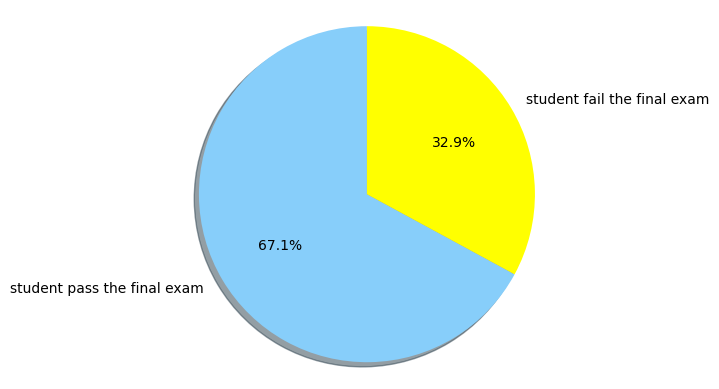

In [11]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [265, 130]
colors=['lightskyblue','yellow']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- It is likely that most students succeeded in the exam, and our goal is to minimize student failure as much as possible.




 ### a)Correlation heatmap

- The Correlation Heatmap is a term used in statistical analysis and data visualization. It refers to a map of the correlations (relationships)    between different variables in a dataset, typically represented as a colored matrix.
- 
In a Correlation Heatmap, colors are used to illustrate the strength and direction of the correlation between variables. Dark colors usually   indicate a negative correlation (when the value of one variable increases, the value of the other decreases), while light colors indicate a positive correlation (when the value of one variable increases, the value of the other also increases)






Text(0.5, 1.0, 'Correlation Heatmap')

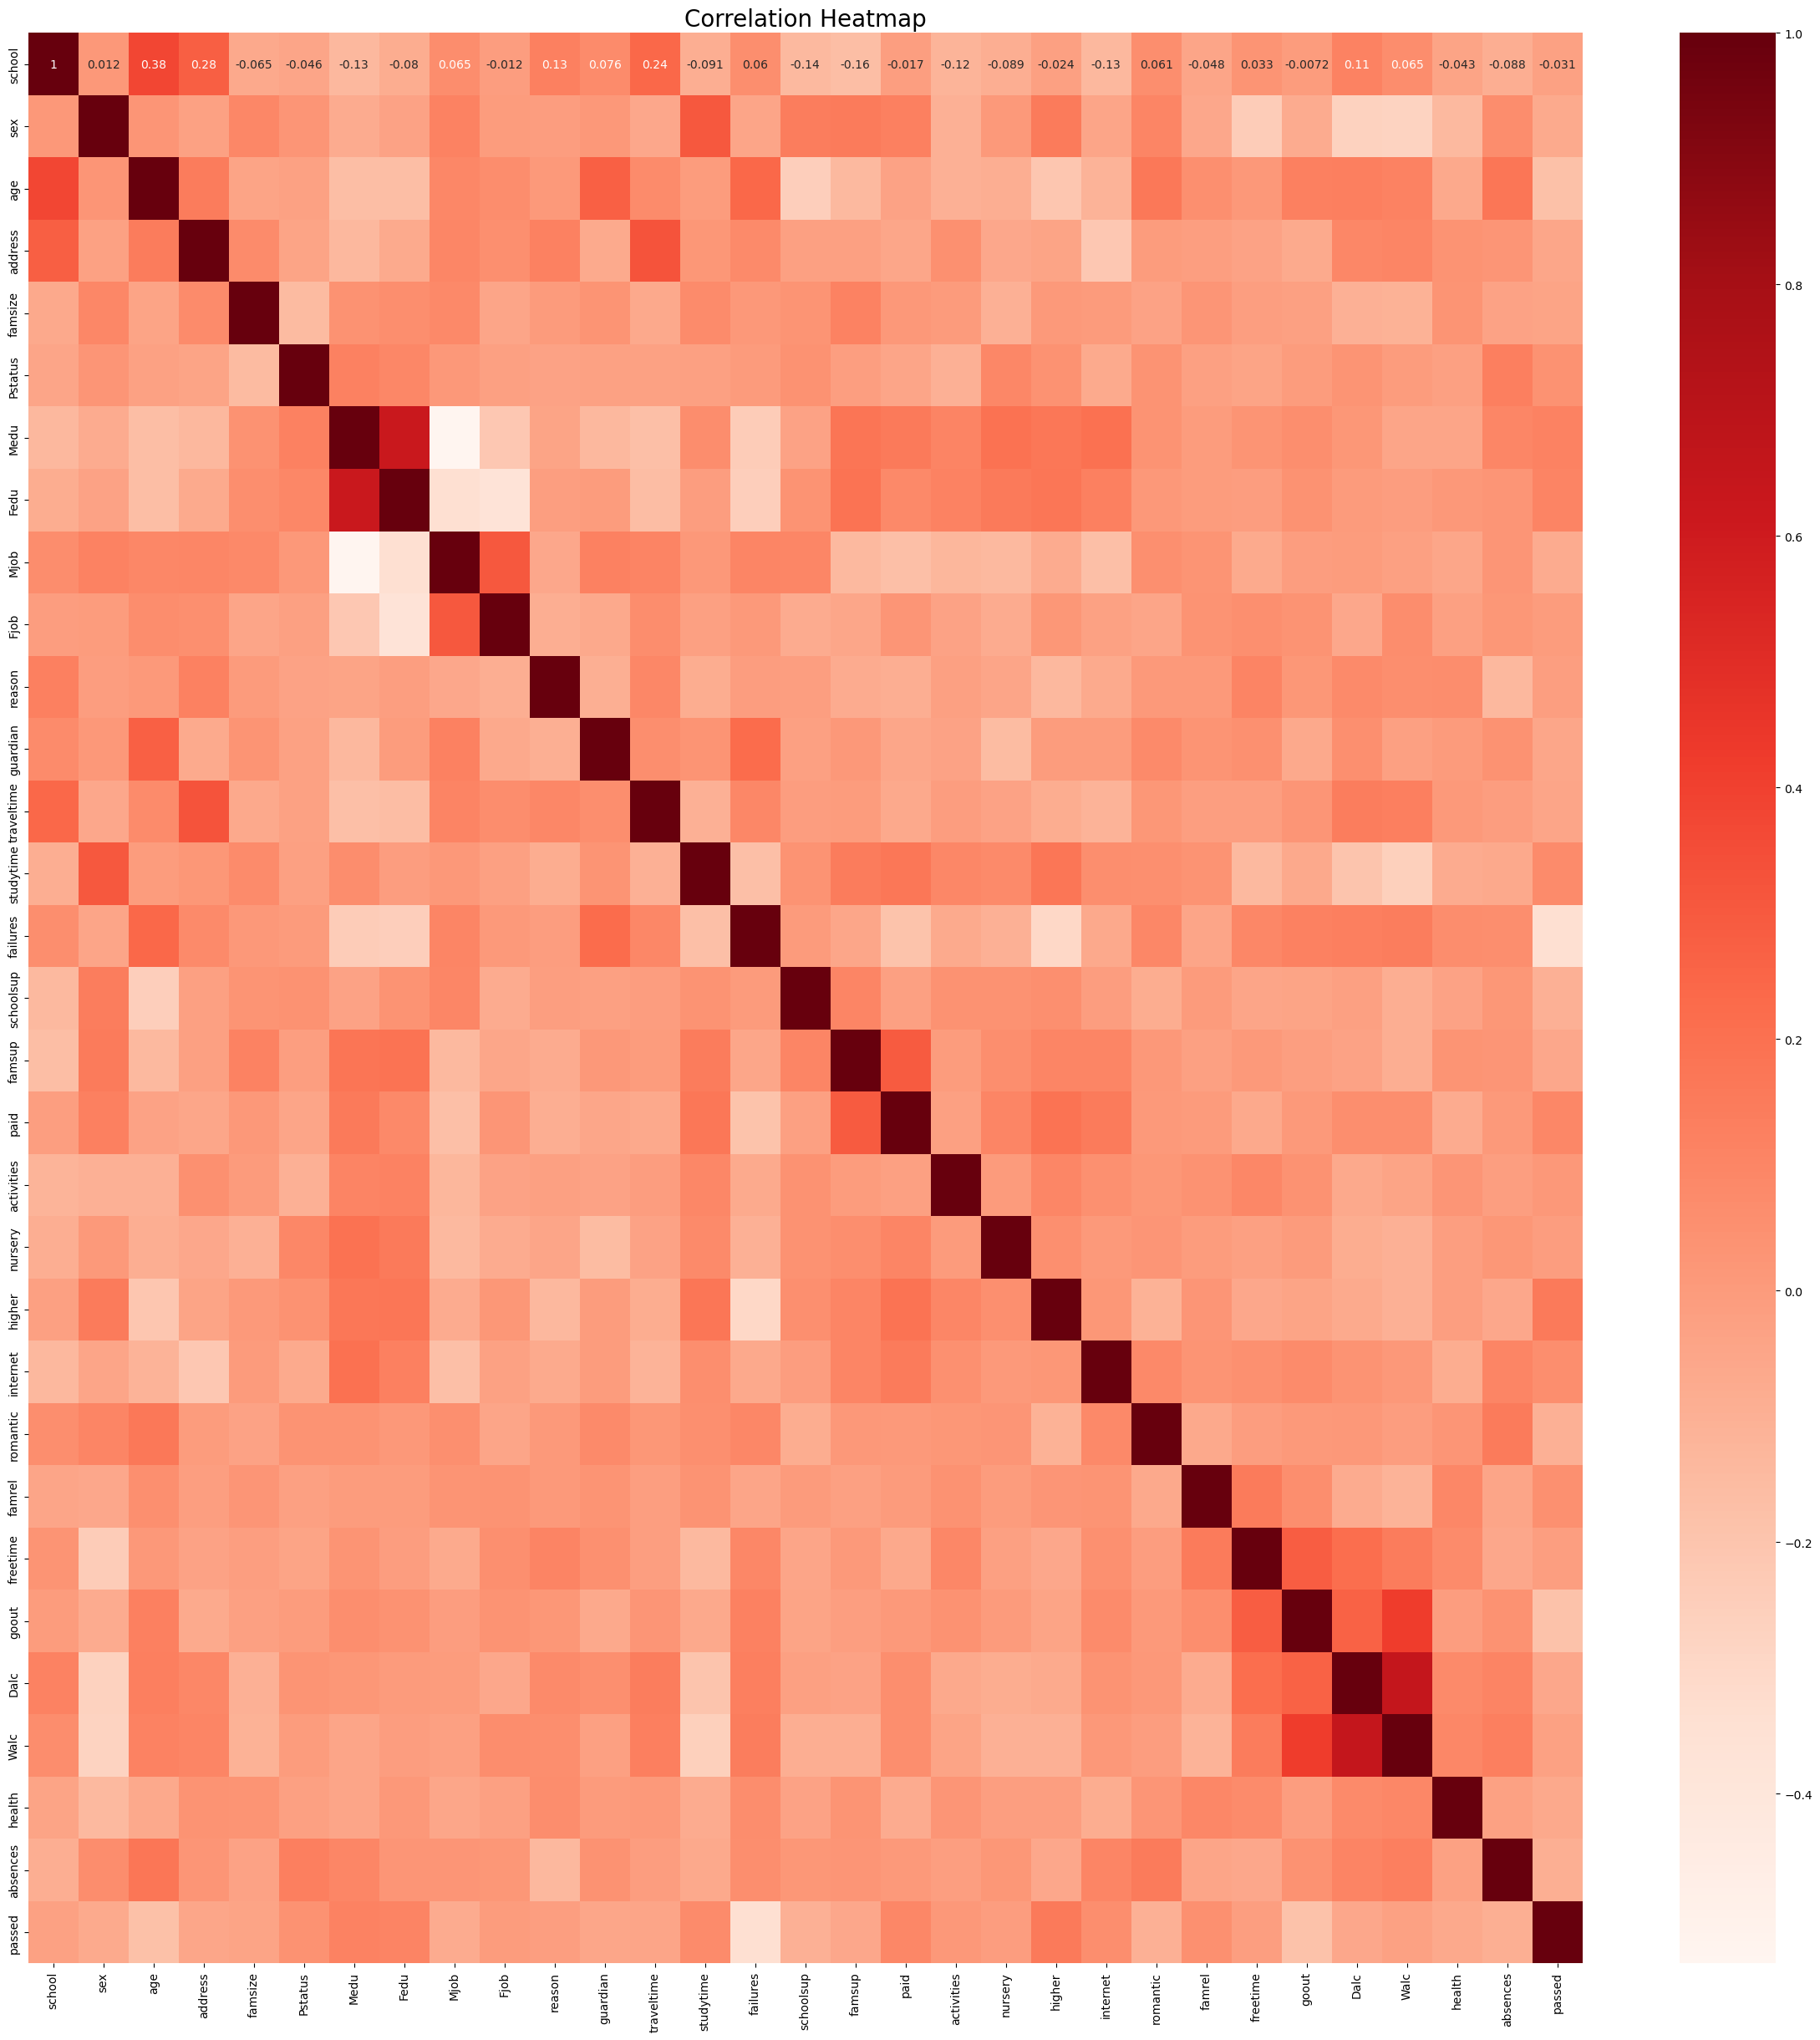

In [12]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

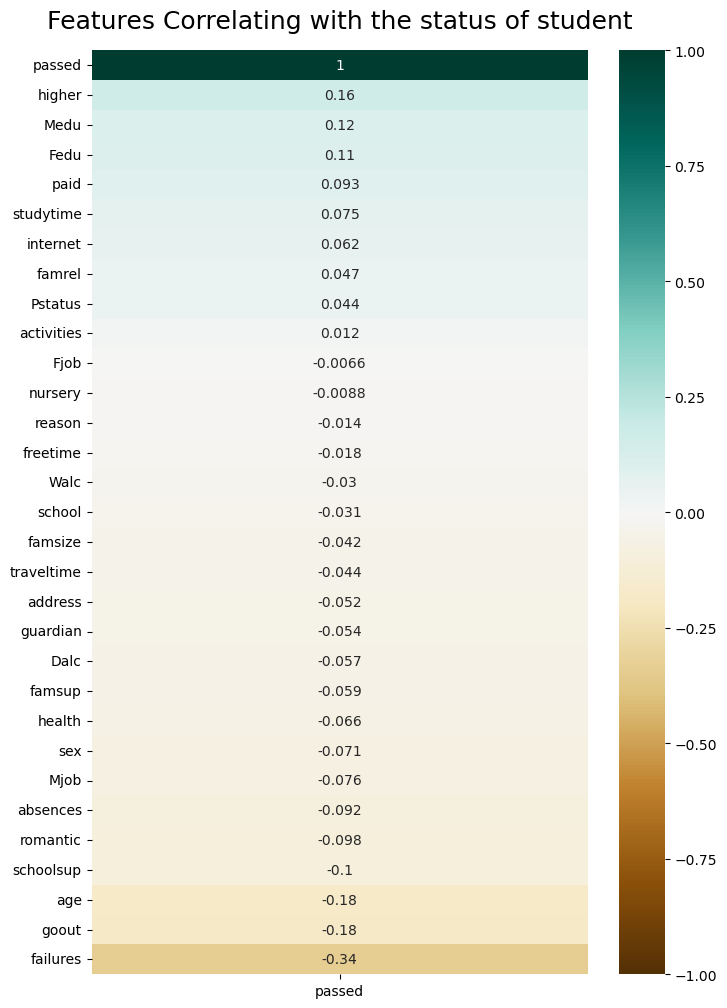

In [13]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

### Correlation Heatmap Insights (Summary)

1. **Past Failures**: Strong negative correlation with final grade. More past failures lead to lower final grades.
2. **Study Time**: Positive correlation with final grade. More study time leads to higher grades.
3. **Parental Education**: Higher parental education (both mother and father) correlates positively with better student performance.
4. **Going Out**: Negative correlation with final grade. Frequent social outings lead to lower grades.
5. **Alcohol Consumption**: Both weekday and weekend alcohol consumption negatively correlate with final grades.
6. **School Support**: Slight negative correlation. Students needing extra support tend to struggle more.
7. **Family Relationship Quality**: Slight positive correlation. Better family relationships contribute to better grades.
8. **Health Status**: Slight positive correlation. Healthier students tend to perform better.
9. **Age**: Slight negative correlation. Older students tend to have lower grades.
10. **Internet Access**: Positive correlation. Access to the internet supports better academic performance.

### b) Distribution plot

In this step, let us take a deeper look at each feature and create a final summary of the best social, demographic, and school conditions.

#### b.1) Student status  By goout

In [14]:
df["goout"].unique()

array([0.75, 0.5 , 0.25, 0.  , 1.  ])

Text(0.5, 0, 'Student status')

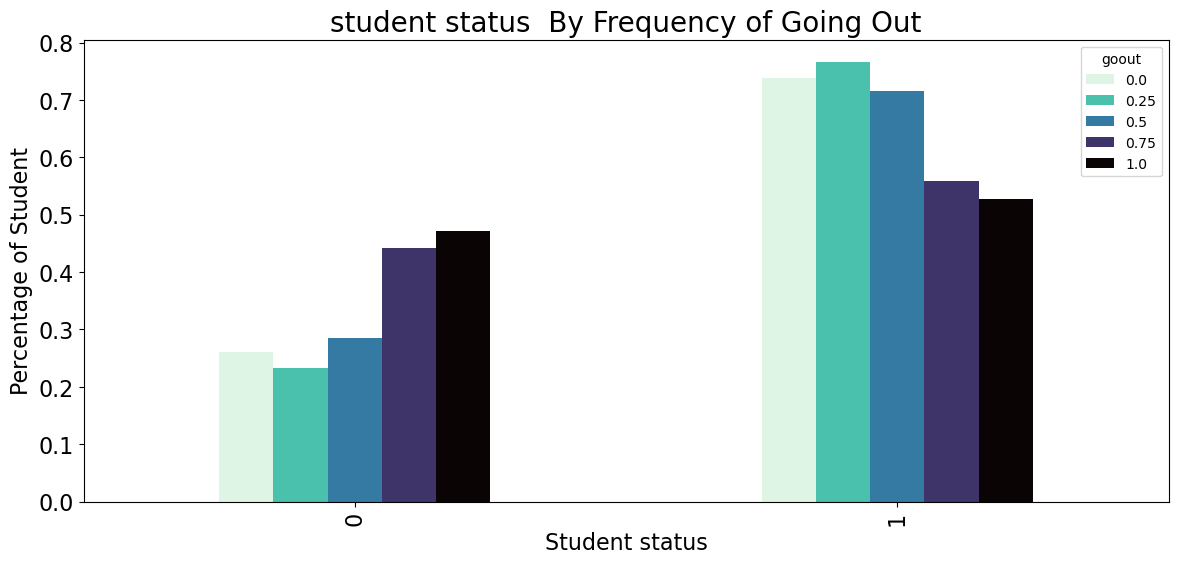

In [15]:
# going out
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=df.passed, columns=df.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('student status  By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)

-C1:  It seems that most of the individuals who passed the exam had fewer hours spent going out, and as a result, we should regulate the hours spent going out with friends.

#### b.2)Student status by romantic relation:

<Figure size 640x480 with 0 Axes>

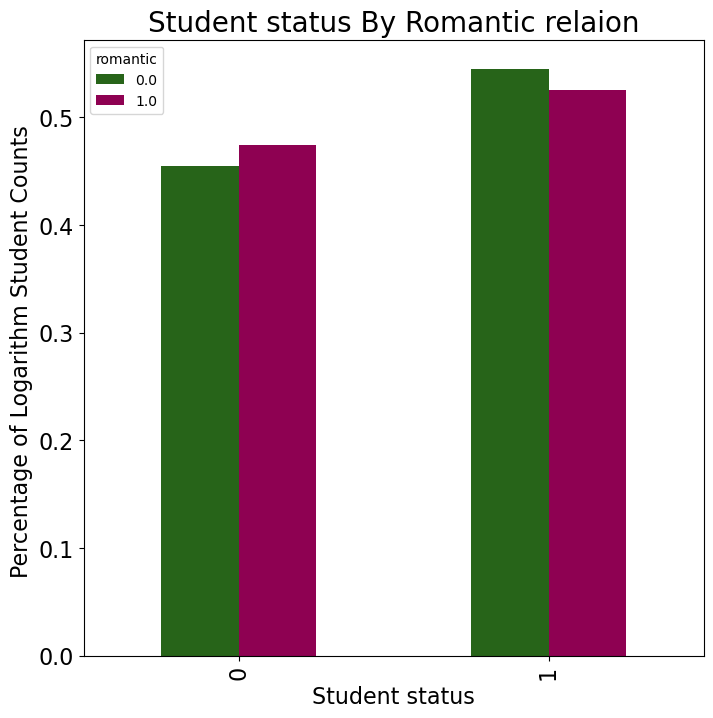

In [16]:
# romantic status
romance_tab1 = pd.crosstab(index=df.passed, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Student status By Romantic relaion', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()
# 0 in romantic mean no romantic relation 

-C2:Most of people whow passed the exam had no romantic relation ,sow no relation could be a good choice for better performance.

#### b.3)Student status by  mother job :

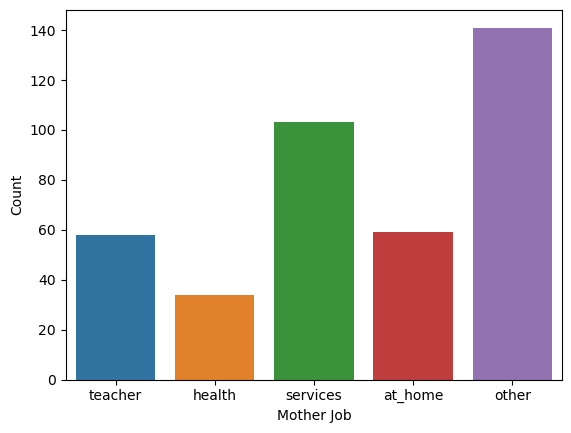

In [17]:
# 1) mother job 
# Mjob distribution
f, fx = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=dfv, order=['teacher','health','services','at_home','other'])
fx = fx.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)

<Figure size 640x480 with 0 Axes>

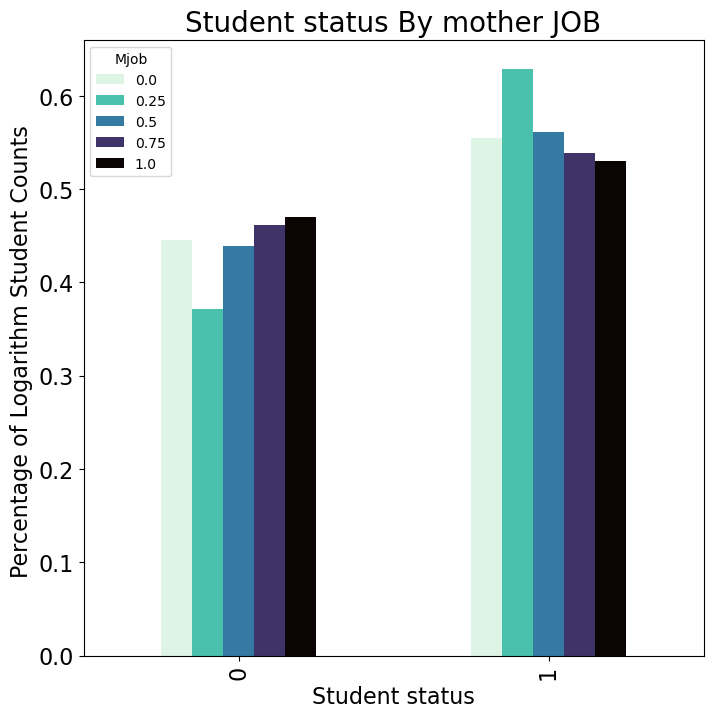

In [18]:
mjob_tab1 = pd.crosstab(index=df.passed, columns=df.Mjob)
mjob_tab = np.log(mjob_tab1)
mjob_perc = mjob_tab.apply(perc).reindex(index)
plt.figure()
mjob_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(8,8))
plt.title('Student status By mother JOB', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Student status', fontsize=16)
plt.show()
#'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4

C3:It's seems that students who's mother work as doctor reach good status

#### b.4)Student status by  mother and father education :

C:\Users\96653\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96653\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


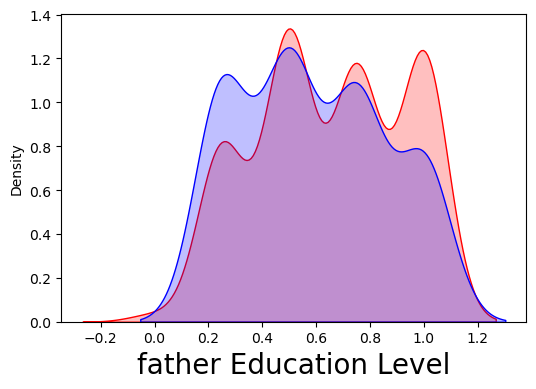

In [19]:
#father education:

good = df.loc[df.passed == 1].copy()
poor = df.loc[df.passed == 0].copy()
good['good_student_father_education'] = good.Fedu
poor['poor_student_father_education'] = poor.Fedu

plt.figure(figsize=(6, 4))
# Updated seaborn kdeplot calls to use fill instead of shade
sns.kdeplot(good['good_student_father_education'], fill=True, color="r")
sns.kdeplot(poor['poor_student_father_education'], fill=True, color="b")
plt.xlabel('father Education Level', fontsize=20)
plt.show()

C:\Users\96653\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96653\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


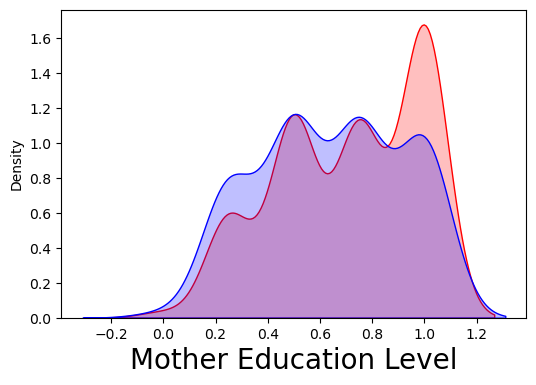

In [20]:
#Mother education:

good = df.loc[df.passed == 1].copy()
poor = df.loc[df.passed == 0].copy()
good['good_student_mother_education'] = good.Medu
poor['poor_student_mother_education'] = poor.Medu

plt.figure(figsize=(6, 4))
# Updated seaborn kdeplot calls to use fill instead of shade
sns.kdeplot(good['good_student_mother_education'], fill=True, color="r")
sns.kdeplot(poor['poor_student_mother_education'], fill=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)
plt.show()

From the graphs, it appears that both maternal and paternal education have an impact on student performance, as we see higher density at higher educational levels for both parents.


#### b.5)Student status by deseire to take heigher education:

Text(0, 0.5, 'Percentage of Student')

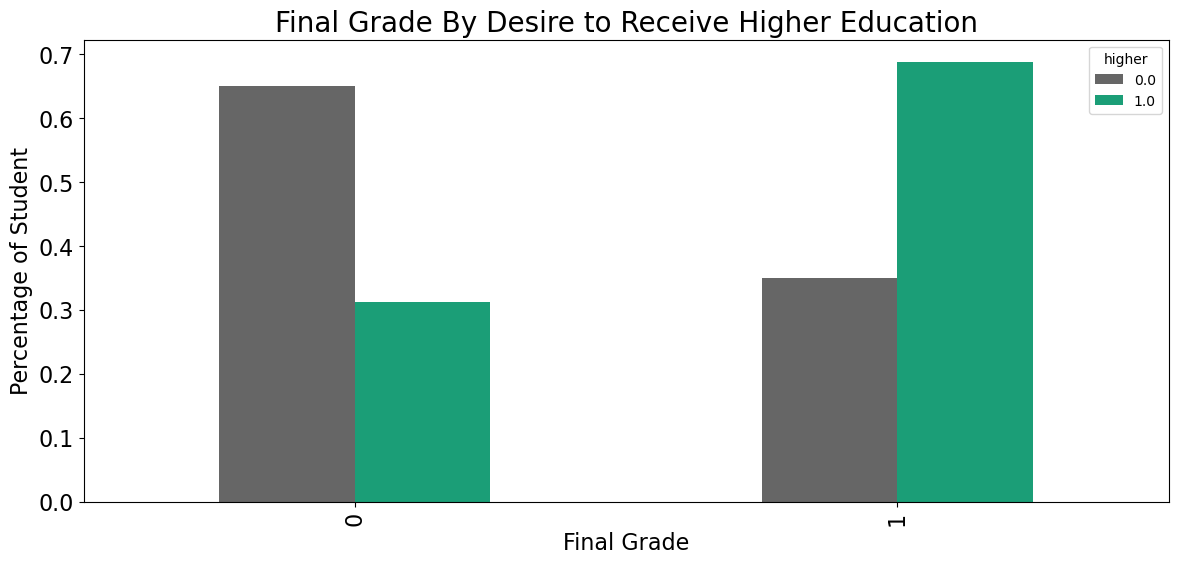

In [21]:
higher_tab = pd.crosstab(index=df.passed, columns=df.higher)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C4:Most of students who passed the exam want to take heigher education sow it could be a good idea to encourage your kids or students to take heigher education.

#### b.6)Student status by age 

Text(0, 0.5, 'Percentage of Student')

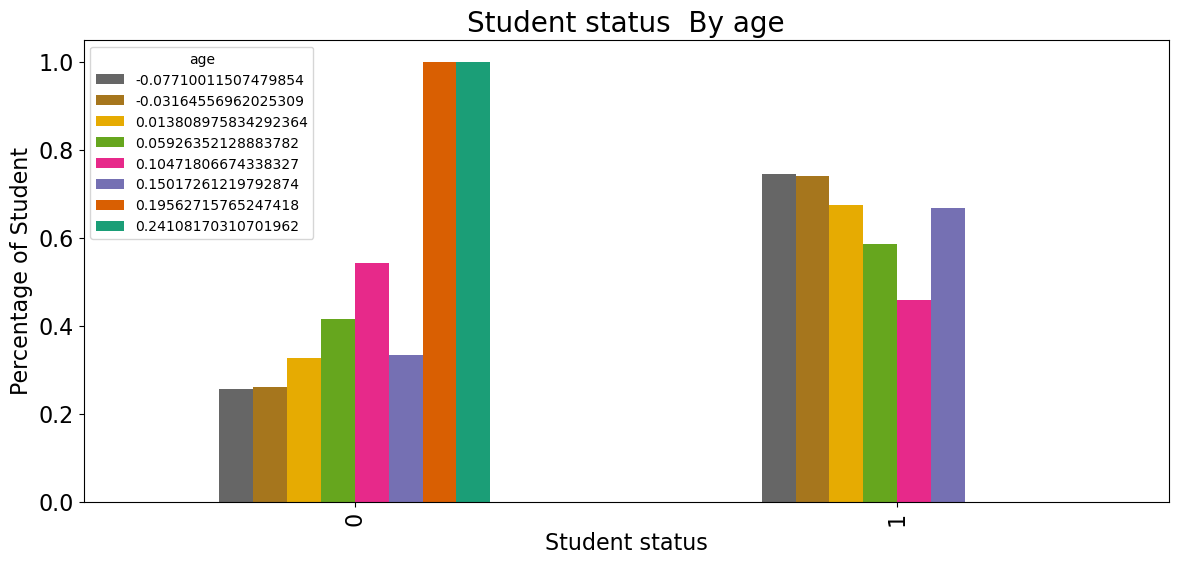

In [22]:
#impact of age
higher_tab = pd.crosstab(index=df.passed, columns=df.age)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student status  By age', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C5:Age also plays an important role in a student's success. Most of the individuals who passed the exam were younger, around 15 years old, whereas most of those who failed were around 22 years old. Consequently, it may be better to start school at an earlier age.


#### b.7) Student status by failures:

In [23]:
#impact of failures

Text(0, 0.5, 'Percentage of Student')

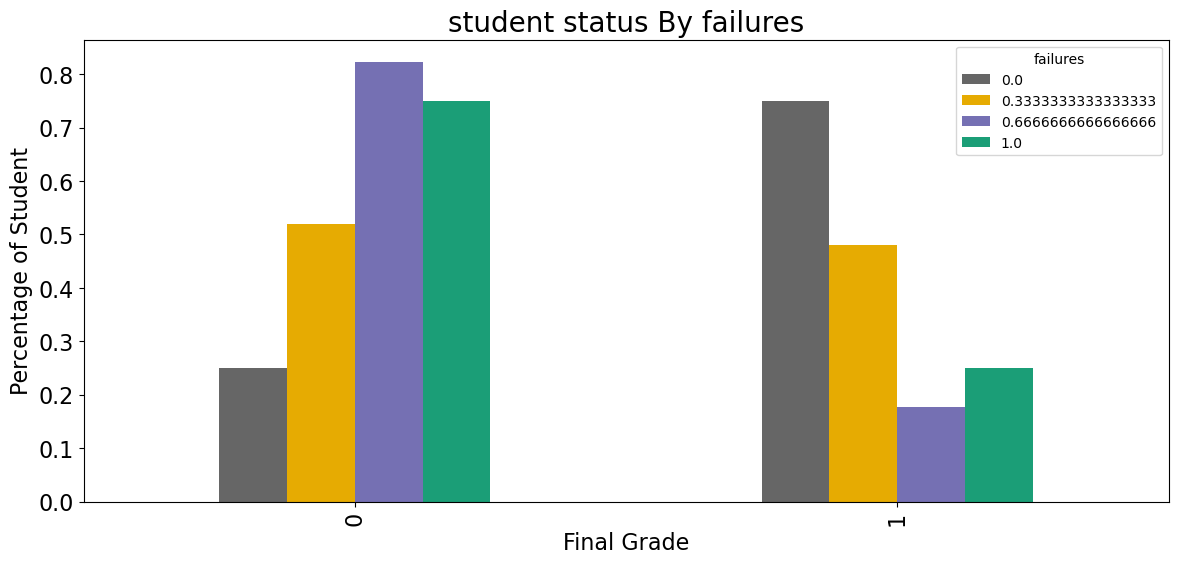

In [24]:
fail_tab = pd.crosstab(index=df.passed, columns=df.failures)
fail_perc = fail_tab.apply(perc).reindex(index)
fail_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By failures', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C6:most of student who passed the exam had 0 failures sow it could be a good choice to study hard and pass all the grades

#### b.8) Student status by area


Text(0.5, 1.0, 'Address Distribution')

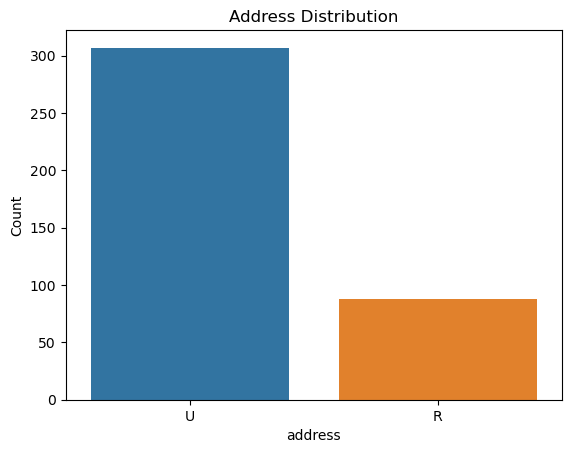

In [25]:
#first let's see the destribution of students who live in urban or rural area
f, fx = plt.subplots()
figure = sns.countplot(x = 'address', data=dfv, order=['U','R'])
fx = fx.set(ylabel="Count", xlabel="address")
figure.grid(False)
plt.title('Address Distribution')

Text(0.5, 0, 'Student status')

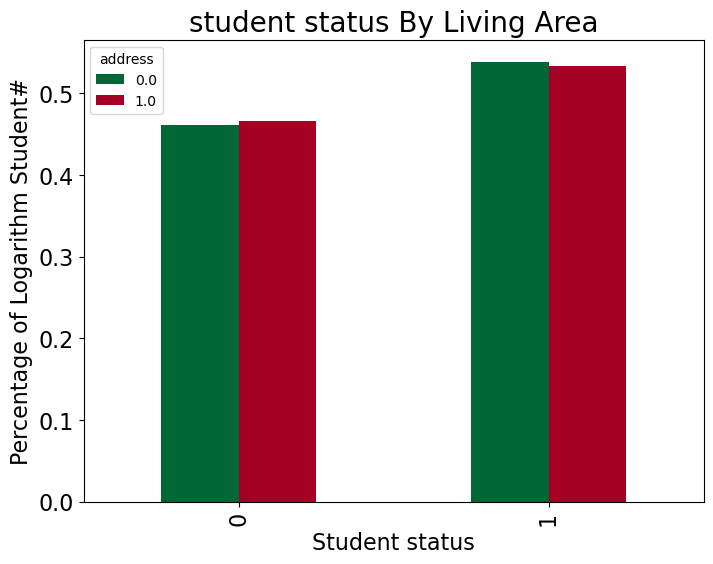

In [26]:
ad_tab1 = pd.crosstab(index=df.passed, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)
ad_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('student status By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Student status', fontsize=16)

C7:Area doesn't had an impact on student performance even people with good results live in contry side

#### b.9) Student status by alchool consumption :

Text(0, 0.5, 'Percentage of Student')

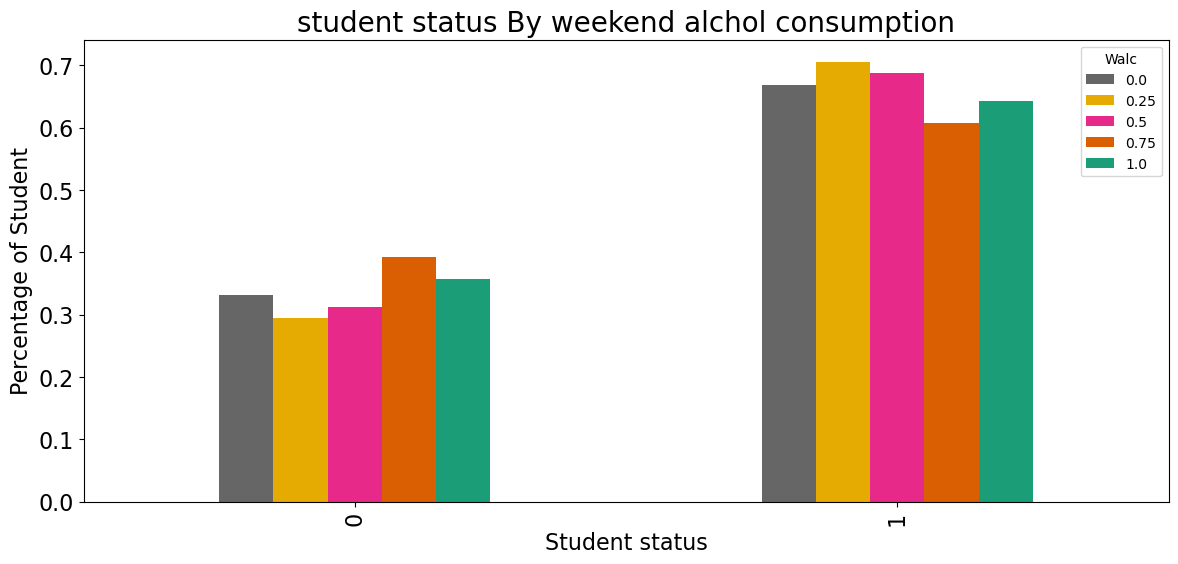

In [27]:
#impact of weekend alcohol consumption in student performance
alc_tab = pd.crosstab(index=df.passed, columns=df.Walc)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By weekend alchol consumption', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C:\Users\96653\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\96653\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Level of Alcohol Consumption')

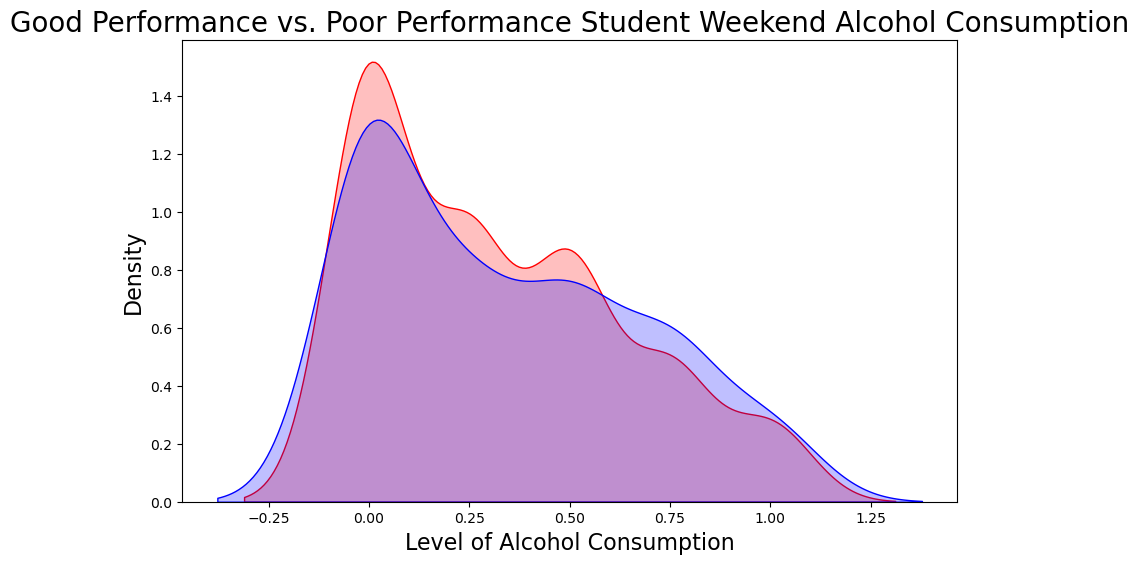

In [28]:
# weekend alcohol consumption
# create good student dataframe


good = df.loc[df.passed == 1].copy()
good['good_alcohol_usage'] = good.Walc

# Create poor student dataframe
poor = df.loc[df.passed == 0].copy()
poor['poor_alcohol_usage'] = poor.Walc

# Plotting
plt.figure(figsize=(10,6))
p1 = sns.kdeplot(good['good_alcohol_usage'], fill=True, color="r")
p1 = sns.kdeplot(poor['poor_alcohol_usage'], fill=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)



For weekely alchool consumption it doesn't have an strong impact on student performance .Even people with low consumption had low grad.

#### b.10) Student status by internet accessibility:

Text(0, 0.5, 'Percentage of Student')

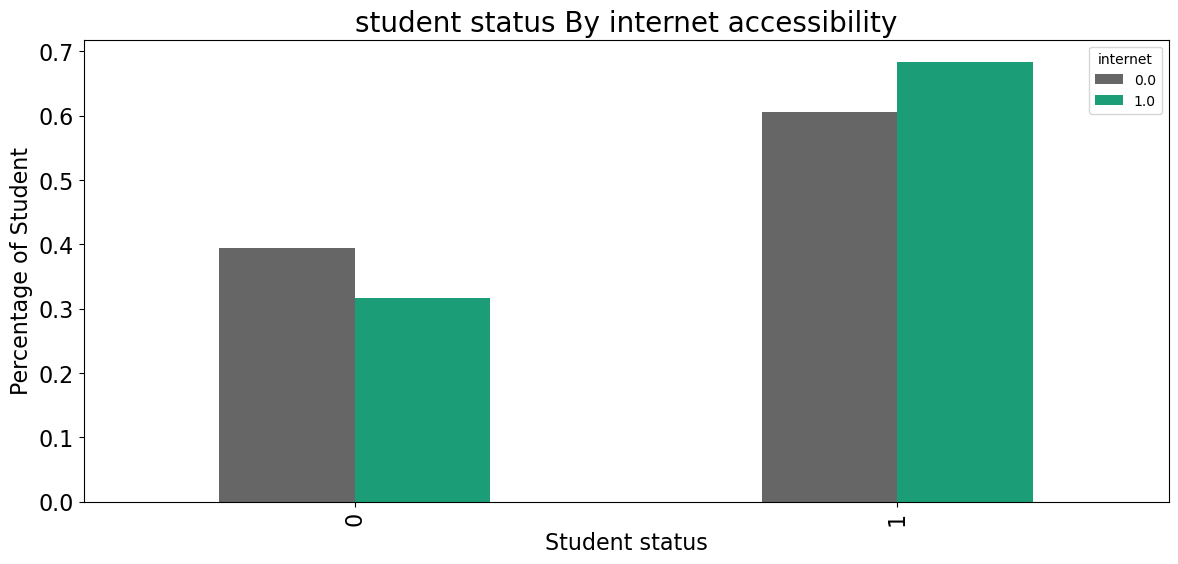

In [29]:
alc_tab = pd.crosstab(index=df.passed, columns=df.internet)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By internet accessibility', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C9:Most of student who passed the exam had the accessibility to internet ,sow we should provide a fair materials's education

#### b.11) Student status by wekelly Study time :

Text(0, 0.5, 'Percentage of Student')

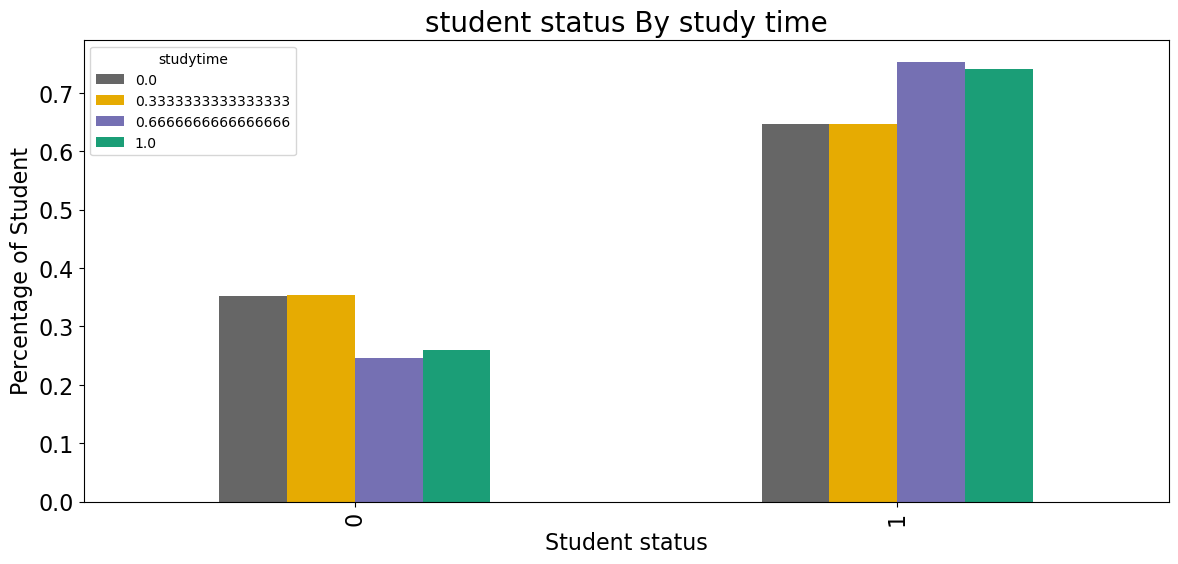

In [30]:
stu_tab = pd.crosstab(index=df.passed, columns=df.studytime)
stu_perc = stu_tab.apply(perc).reindex(index)
stu_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By study time', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C10:Most of students who passed the exam study 5-10 hours weekely

#### b.12)Student status by health:

Text(0, 0.5, 'Percentage of Student')

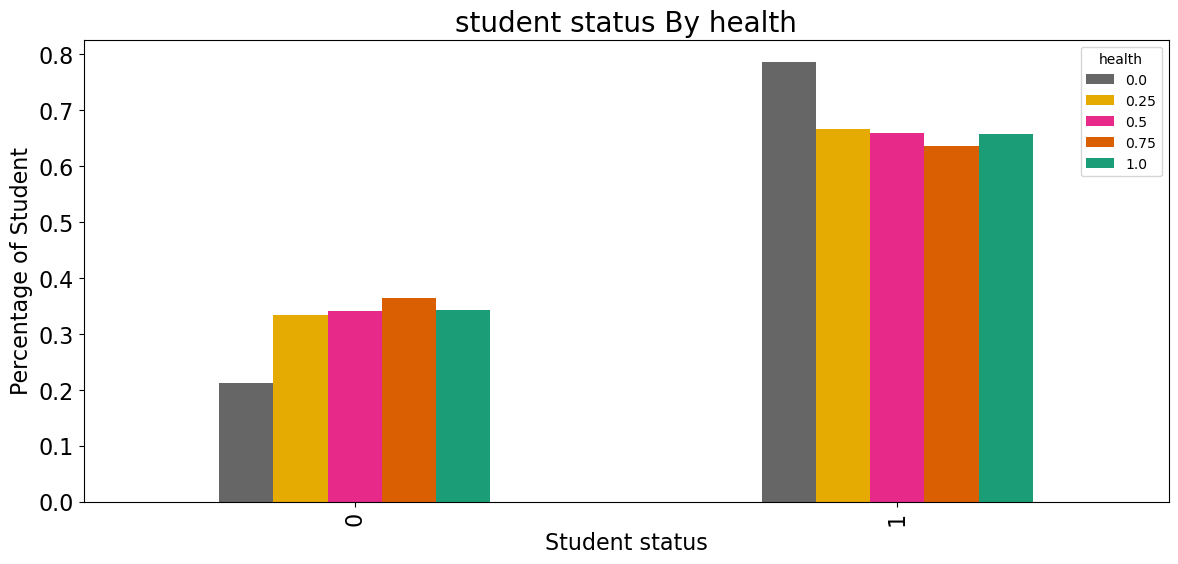

In [31]:
he_tab = pd.crosstab(index=df.passed, columns=df.health)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By health', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


**making summary for good condition to reach heigh academic potentials:**

### 3) General conclusion :

#### Summary:

After dealing with the most relevant features, a high-achieving student with excellent conditions for academic potential is likely to have this profile :

1. Not going out with friends frequently
2. Not in a romantic relationship
3. Parents receive higher education 
4. Having a strong desire to pursue higher education
5. The mother is a healthcare professional
6. The father is a teacher
7. Not missing classes
8. Having access to the internet
9. Studying more than 10 hours a week
10. Healthy0. Healthy

# Choosing the most appropriate algorithm for the model:   <h5 style='color:red;font-family:cursive;font-size:4.5mm'>


- First, we divide the data set into training (80%) and test (20%) sets.

- Apply SMOTE to balance the training set since the dataset contains the target variable passed, which is imbalanced with 265 instances of yes and 130 instances of no.
- Then create three different pre-selected classifiers to try: logistic regression, support vector machine, and decision tree.

-
Each model is trained on the training data and then used to predict the results on the test set

-
The performance of each model is evaluated based on accuracy and a detailed rating report.
  - 
Finally, the best performing model based on accuracy and avoiding overfitting is identified and selected.


**Training and Evaluation:**

- Training: Use the resampled training data (x_train_resampled, y_train_resampled).
- Evaluationn: Use the original test data (x_test, y_test).

This approach ensures that the model is trained on balanced data to address issues like class imbalance, while evaluation on the original test set provides a true measure of the model's performance.
e

In [32]:
# Split the data into features and target
x = df.drop('passed', axis=1)
y = df['passed']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Apply custom feature scaling to the training data
x_train_scaled = feature_scaling(pd.DataFrame(x_train_resampled, columns=x_train.columns))

# Check for NaN values
print(x_train_scaled.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64


In [33]:
# let's create a model and train it 

# Initialize models
logisticRegr = LogisticRegression(C=1, max_iter=10000)
svmModel = SVC()
decisionTree = DecisionTreeClassifier()

# Dictionary of models
models = {
    'Logistic Regression': logisticRegr,
    'SVM': svmModel,
    'Decision Tree': decisionTree
}


In [34]:

# Train models and evaluate

results = {}
for name, model in models.items():
    model.fit(x_train_resampled, y_train_resampled)  # Fit model on resampled training data
    y_pred = model.predict(x_test)  # Predict on testing data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred)  # Generate classification report
    results[name] = (accuracy, report)  # Store results


# Display results
for name, (accuracy, report) in results.items():
    print(f"{name} Accuracy: {accuracy}")
    print(report)

Logistic Regression Accuracy: 0.6582278481012658
              precision    recall  f1-score   support

         0.0       0.56      0.50      0.53        30
         1.0       0.71      0.76      0.73        49

    accuracy                           0.66        79
   macro avg       0.63      0.63      0.63        79
weighted avg       0.65      0.66      0.65        79

SVM Accuracy: 0.5949367088607594
              precision    recall  f1-score   support

         0.0       0.45      0.30      0.36        30
         1.0       0.64      0.78      0.70        49

    accuracy                           0.59        79
   macro avg       0.55      0.54      0.53        79
weighted avg       0.57      0.59      0.57        79

Decision Tree Accuracy: 0.5569620253164557
              precision    recall  f1-score   support

         0.0       0.37      0.23      0.29        30
         1.0       0.62      0.76      0.68        49

    accuracy                           0.56        79
   

In [35]:
#choose the best model


# Function to extract accuracy from the classification report
def extract_metrics(report):
    if isinstance(report, str):
        lines = report.strip().split('\n')
        accuracy_line = [line for line in lines if 'accuracy' in line][0]
        accuracy = float(accuracy_line.split()[1])
        return accuracy
    else:
        raise ValueError("Report is not in string format")

# Function to choose the best model
def choose_best_model(results):
    best_model_name = None
    best_score = -float('inf')
    best_accuracy = None
    overfitting_threshold = 0.05
    potential_models = []

    for model_name, metrics in results.items():
        accuracy, report = metrics  # Unpack the tuple
        
        print(f"Model: {model_name} - Accuracy: {accuracy}")

        # Check for overfitting by comparing CV score and accuracy
        cv_score = accuracy  # Using accuracy as CV score for simplicity in this example
        overfitting_margin = abs(cv_score - accuracy)
        if overfitting_margin > overfitting_threshold:
            print(f"{model_name} potentially overfitting.")
            potential_models.append((model_name, cv_score, accuracy, overfitting_margin))
        else:
            if cv_score > best_score:
                best_model_name = model_name
                best_score = cv_score
                best_accuracy = accuracy

    if not best_model_name and potential_models:
        # If all models are potentially overfitting, select the one with the smallest overfitting margin
        best_model_name, best_score, best_accuracy, _ = min(potential_models, key=lambda x: x[3])

    return best_model_name, best_score, best_accuracy

# Example training and evaluation code
# Assuming x_train, y_train, x_test, y_test are defined and preprocessed


results = {}
for name, model in models.items():
    model.fit(x_train_resampled, y_train_resampled)  # Fit model on resampled training data
    y_pred = model.predict(x_test)  # Predict on testing data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred)  # Generate classification report
    results[name] = (accuracy, report)  # Store results


# Display results
for name, (accuracy, report) in results.items():
    print(f"{name} Accuracy: {accuracy}")
    print(report)

best_model_name, best_score, best_accuracy = choose_best_model(results)

# Print the best model name with reasons for its selection
if best_model_name:
    print(f"\nBest Model: {best_model_name}")
    print(f"Reason: {best_model_name} was chosen due to its high accuracy,\n indicating it is well-suited for the dataset and has the smallest risk of overfitting among the options.")
    print(f"Accuracy: {best_score}")
else:
    print("\nNo suitable model found that meets the overfitting criteria.")


Logistic Regression Accuracy: 0.6582278481012658
              precision    recall  f1-score   support

         0.0       0.56      0.50      0.53        30
         1.0       0.71      0.76      0.73        49

    accuracy                           0.66        79
   macro avg       0.63      0.63      0.63        79
weighted avg       0.65      0.66      0.65        79

SVM Accuracy: 0.5949367088607594
              precision    recall  f1-score   support

         0.0       0.45      0.30      0.36        30
         1.0       0.64      0.78      0.70        49

    accuracy                           0.59        79
   macro avg       0.55      0.54      0.53        79
weighted avg       0.57      0.59      0.57        79

Decision Tree Accuracy: 0.5569620253164557
              precision    recall  f1-score   support

         0.0       0.37      0.23      0.29        30
         1.0       0.62      0.76      0.68        49

    accuracy                           0.56        79
   

# 1- Logistic Regression implementation


In [36]:
# Train the logistic regression model
model = LogisticRegression(C=1, max_iter=10000)  # Increase max_iter to ensure convergence
model.fit(x_train_scaled, y_train_resampled)


#Despite earlier testing multiple models, this line specifically retrains the Logistic Regression model using the training data (x_train and y_train)

LogisticRegression(C=1, max_iter=10000)

In [37]:
#The model is now trained and ready to make predictions :) 

In [38]:
# Make predictions on the test set
y_pred=logisticRegr.predict(x_test)
y_pred

#uses the retrained Logistic Regression model to make predictions on the test dataset (x_test). 
#The predictions are stored in the variable y_pred, which contains the predicted class labels for each instance in the test set.

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.])

# 2- Model evaluation


To evaluate a classification model, we will followe these key steps:

1- Calculate the Accuracy: This measures the percentage of total correct predictions made by the model, providing a quick overview of effectiveness.

2- Visualize the Confusion Matrix: This tool displays the number of correct and incorrect predictions broken down by each class. It helps in understanding the types of errors the model is making.

3- Plot the ROC Curve: The Receiver Operating Characteristic curve shows the model's performance across various threshold levels by plotting the true positive rate against the false positive rate. The area under this curve (AUC) quantifies the overall ability of the model to discriminate between the classes.

4- Recall Evaluation: Recall measures the model's ability to correctly identify positive cases, ensuring the model's effectiveness in predicting students' academic performance.

 

**1- Calculate the Accuracy:**

In [39]:
#let's have a look at the accuracy of the model

Sctest=logisticRegr.score(x_test,y_test)
Sctrain=logisticRegr.score(x_train,y_train)

print('Accuracy test is: ',Sctest)
print('Accuracy train is: ',Sctrain)


f1 = f1_score(y_test, y_pred, average='macro')

print('\n#f1 score is: ',f1)

Accuracy test is:  0.6582278481012658
Accuracy train is:  0.6867088607594937

#f1 score is:  0.6294945284002085


We obtained two accuracy values, one was obtained using the training set and the other was obtained using the test set.

It may be a good idea to compare the two, as a case where the accuracy of the training set is much higher may indicate overfitting. Test set accuracy is more relevant for evaluating performance on unseen data since it is unbiased.

**2- Visualize the Confusion Matrix:**

**Confusion Matrix:**

A confusion matrix is a table used to evaluate the performance of a classification model. It provides a comprehensive summary of the prediction results by comparing the actual and predicted classifications. The matrix helps in identifying the types of errors the model makes

**Components of a Confusion Matrix:**

For a binary classification problem, the confusion matrix typically includes the following components:

-	**True Positive (TP):** The number of instances correctly predicted as positive.
-	**False Positive (FP):**  The number of instances incorrectly predicted as positive.
-	**False Negative (FN):** The number of instances incorrectly predicted as negative.
-	**True Negative (TN):** The number of instances correctly predicted as negative.

**Key Metrics Derived from the Confusion Matrix:**

-	**Accuracy:** The ratio of correctly predicted instances (both true positives and true negatives) to the total instances.
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$
-	**Precision (Positive Predictive Value):** The ratio of correctly predicted positive observations to the total predicted positives.
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
-	**Recall (True Positive Rate or Sensitivity):** The ratio of correctly predicted positive observations to all actual positives.
$$
\text{Recall (TPR)} = \frac{TP}{TP + FN}
$$
-	**F1 Score:** The harmonic mean of precision and recall, providing a single metric that balances both conc  ns.
-	
$$\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$



In [40]:
#now, we can get the confusion matrix with confusion_matrix():

confusion_matrix(y_test, y_pred)

array([[15, 15],
       [12, 37]], dtype=int64)

<Axes: >

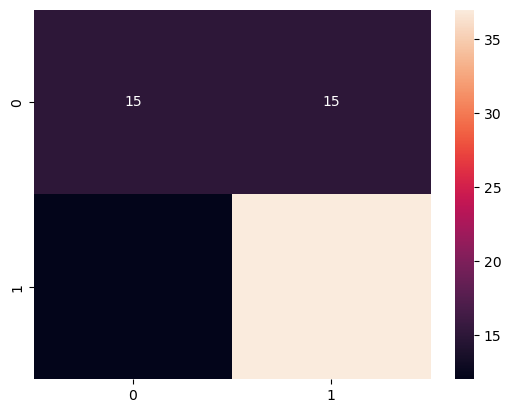

In [41]:
#let's visualize the confusion matrix:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

We can now get the report on classification as a string or dictionary with classification_report():

In [42]:
#import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.50      0.53        30
         1.0       0.71      0.76      0.73        49

    accuracy                           0.66        79
   macro avg       0.63      0.63      0.63        79
weighted avg       0.65      0.66      0.65        79



**3- Plot the ROC Curve:**

**ROC Curve:**

The ROC (Receiver Operating Characteristic) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold setting.

**Key Components of the ROC Curve**
- True Positive Rate (TPR): Also known as sensitivity or recall, it is the ratio of correctly predicted positive observations to the actua positives:
 s

$$ \text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

- False Positive Rate (FPR): It is the ratio of incorrectly predicted positive observations to the actual negative 
  :
$$ \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}} $$ 


-  Diagonal Line:
   
The dashed diagonal line represents a random classifier that does no better than random guessing. This line divides the ROC space; points above the diagonal represent good classification results (better than random), while points below the line indicate poor results (worse than rando).

**Interpreting the ROC Curve:**
- The closer the curve follows the left-hand border and then the top border of the ROC space, the better the classifier. This indicates high TPR and low FPR.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the clasifier..

In [43]:
#ploting the roc_curve

fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='LogisticRegr')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('LogisticRegr ROC curve')
p=plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print(f'\n\n*the ROC curve: {roc_auc}')



*the ROC curve: 0.6275510204081632


the ROC curve shows a modest performance, with the true positive rate (TPR) increasing as the false positive rate (FPR) increases. The curve is above the diagonal, indicating the model performs better than random guessing but has room for improvement.

**4- Recall Evaluation**:


Recall measures the model's ability to correctly identify positive cases, ensuring the model's effectiveness in predicting students' academic performance.


In [44]:
# Define a function to evaluate the model with recall
def evaluate_model_with_recall(model, x_test, y_test):
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')
    return recall

In [45]:
#evaluate the model with recall
evaluate_model_with_recall(logisticRegr, x_test, y_test)
 

Recall: 0.7551020408163265


0.7551020408163265

# 3-improving model accuracy

### Techniques Used to Improve Model Accuracy

In this project, we enhanced the performance of the Logistic Regression model through these processes:

1. **Recall Evaluation**: After identifying the best model, we evaluated its performance using the recall metric. Recall measures the model's ability to correctly identify positive cases, ensuring the model's effectiveness in predicting students' academic performans.

2. **Hyperparameter Tuning**: We used GridSearchCV to find the optimal set of hyperparameters for improving the model's accuracy. Various values for the `C` and `solver` parameters were tested to select the best model based on the recall metric.

3. **Optimal Data Splitting**: Using a fixed random state (`optimal_state = 78657622`) for splitting the data ensures that the results are reproducible. This consistency is crucial for comparing model performance accurately across different runs and for reliable evaluation.

4. **Final Model Evaluation**:
   - **Comprehensive Metrics**: After tuning the hyperparameters, the script evaluates the model using multiple performance metrics:
     - **Accuracy Score**: Measures the overall correctness of the model's predictions.
     - **F1 Score**: Provides a balance between precision and recall, useful when you need to take both false positives and false negatives into account.
     - **ROC curve**:  illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold setting.
     - **Confusion Matrix**: uased to evaluate the performance of a classification model. It provides a comprehensive summary of the prediction results by comparing the actual and predicted classifications. The matrix helps in identifying the types of errors the model makes.

By incorporating these techniques, the script enhances the accuracy and reliability of the Logistic Regression model, ensuring it performs well on both the training and testing datasets and is robust to overfitting.
       

In [46]:

# Function to evaluate the model with recall
def evaluate_model_with_recall(model, x_test, y_test):
    y_pred = model.predict(x_test)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')
    return recall

# Split your data into training and testing sets with the optimal random state

# Generate a new random state each time

#optimal_state = random.randint(1, 100000000)

#best random state
optimal_state = 78657622

# Split your data into training and testing sets with the new random state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=optimal_state)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=optimal_state)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='recall', cv=5)

# Fit GridSearchCV on the resampled training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Get the best model
best_logisticRegr_model = grid_search.best_estimator_

# Evaluate the best model with recall on the original test set
evaluate_model_with_recall(best_logisticRegr_model, x_test, y_test)

# Final model evaluation with the optimal model
y_pred = best_logisticRegr_model.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_pred)

print('\n*Accuracy is: ' + str(accuracy) + '\n\n*f1 score is: ' + str(f1))
print(f'\n*the ROC curve: {roc_auc}')
print('\n*Optimal split_state:', optimal_state)




Recall: 0.8245614035087719

*Accuracy is: 79.74683544303798

*f1 score is: 0.7606060606060607

*the ROC curve: 0.7759170653907496

*Optimal split_state: 78657622


# Re-evaluate improving model accuracy

In [47]:
#accuracy of the model

print('\n\n\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)

yt_lg,yp_lg = y_test,y_pred




*Accuracy is: 79.74683544303798
*f1 score is:  0.7606060606060607


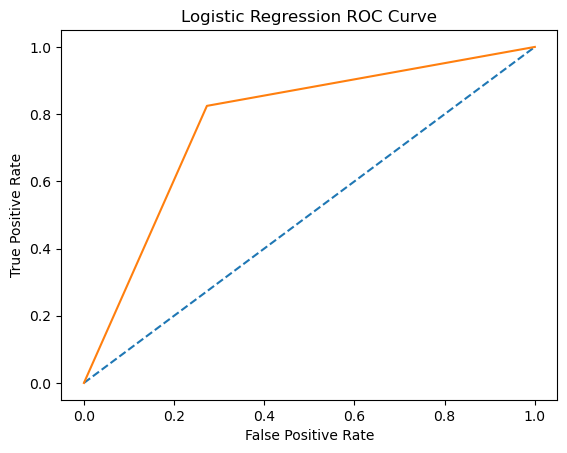

In [48]:
# Plot ROC Curve
fpositif, tpositif, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif, tpositif, label='LogisticRegr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


shows the ROC curve of the improved Logistic Regression model. This curve is closer to the top-left corner, demonstrating a higher true positive rate for a given false positive rate. This suggests that the model's predictive power has significantly increased.

<Axes: >

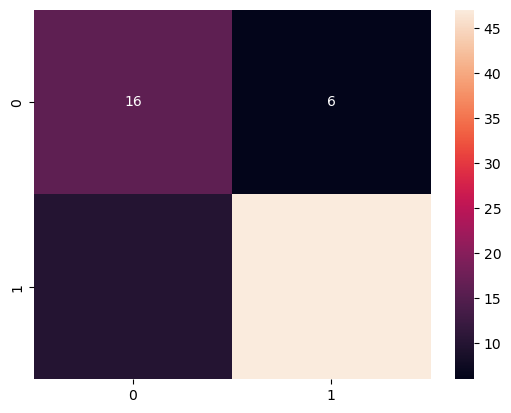

In [49]:

# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [50]:
#reevaluate_model_with_recall
evaluate_model_with_recall(best_logisticRegr_model, x_test, y_test)


Recall: 0.8245614035087719


0.8245614035087719

# Save model

In [51]:
"""
# Save the best model
# Define the model path
model_dir = r'C:\Users\96653\Desktop/‏‏ML1-project'
model_path = os.path.join(model_dir, 'logistic_regression_model.pkl')

# Ensure the directory exists
os.makedirs(model_dir, exist_ok=True)

# Save the model to a file
joblib.dump(best_logisticRegr_model, model_path)  # Ensure you save the best model (model after improvments)
print(f"Model saved to {model_path}")

"""



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 63-64: truncated \UXXXXXXXX escape (2518751865.py, line 14)

# Conclusion
we notice that we went from an accuracy of  65 % to 79.74 %.
and we got a higher value for F1 score as well ; from 0.62 to 0.76  . 



- **1) For the positive impact, it seems that the factors affecting students are:**

   

- **Higher educational aspirations:** Students who aim for higher education tend to perform better.

- **Parental education:** Higher educational levels of both parents, positively influence student performance.

- **Study time:** More hours dedicated to studying correlates with better academic results.

- **Parental occupations:** Specific jobs of parents, like healthcare or teaching, can positively affect student performance due to likely socio-economic benefits and educational support at home.


- **2) For the negative impact, it seems that the factors affecting students are:**


- **Social activities:** Spending a lot of time going out with friends can negatively impact academic performance.

- **Age:** Older students tend to perform worse, which might suggest difficulties in keeping up with school demands or lower motivation.

- **Previous academic failures:** A history of failing exams is a strong indicator of potential future failures.

- **Health issues and high absenteeism:** Poor health and frequent absences from school can significantly hinder academic achievement.

- **Romantic relationships:** Being in a romantic relationship is seen as a distraction that might reduce the focus on academic goals.


In [ ]:
# Check feature importance
importance = logisticRegr.coef_[0]
features = x_train.columns

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()